In [1]:
import pandas as pd
import numpy
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize

In [2]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha = ha.dropna()
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


In [3]:
ha.describe()

,age,sex,cp,trtbps,chol,restecg,thalach,output
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,54.347985,0.673993,0.974359,132.098901,246.860806,0.538462,149.446886,0.534799
std,9.163134,0.469611,1.030456,17.700358,52.569726,0.528059,23.240707,0.499704
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,133.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,1.000000,152.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,1.000000,166.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,2.000000,202.000000,1.000000


In [4]:
X = ha.drop(['output'], axis = 1)
y = ha['output']

## Q1: KNN

In [5]:


log = LogisticRegression()
enc = OneHotEncoder(sparse_output=False)
ct = ColumnTransformer([
                       ('dummify_cp', enc, ['cp']),
                         ('dummify_ecg', enc, ['restecg']),
    ("dummify_s", enc, ['sex'])]
, remainder = 'drop').set_output(transform = 'pandas')

Knn1 = Pipeline(
    [('dummify_everything', ct),('KNN', KNeighborsClassifier())]
)
neigh = {'KNN__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

gscv1 = GridSearchCV(Knn1, neigh, cv = 5, scoring='roc_auc')
gscv1fit = gscv1.fit(X,y)
Knn1 = Pipeline(
    [('dummify_everything', ct),('KNN', KNeighborsClassifier(gscv1fit.best_params_.get('KNN__n_neighbors')))]
)
cv1 = cross_val_score(Knn1, X,y, cv=5, scoring = "roc_auc")
cv1.mean()

0.7980116710875331

In [6]:
gscv1fit.best_params_

{'KNN__n_neighbors': 19}

All variables: .6776

Only cat: .798

cp, restecg,age: .717

cp, restecg,age, sex: .7606

all cat + age, chol: .5999

all cat + chol: .623

all cat + thalach: .7425


In [7]:
Knn1fit = Knn1.fit(X,y)
y_test_preds = Knn1fit.predict(X)
confusion_matrix(y, y_test_preds)

array([[ 52,  75],
       [ 14, 132]], dtype=int64)

In [8]:
y_probs = Knn1fit.predict_proba(X)

In [9]:
y_bin = label_binarize(y, classes=[0,1])

## Q2 Logistic Regression:

In [13]:
X.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalach'], dtype='object')

In [14]:
log = LogisticRegression()
enc = OneHotEncoder(sparse_output=False)
ct = ColumnTransformer([
                       ('dummify_cp', enc, ['cp']),
                         ('dummify_ecg', enc, ['restecg']),
    ("dummify_s", enc, ['sex']),
('nums', FunctionTransformer(lambda x: x), ['chol','age', 'thalach', 'trtbps'])]
, remainder = 'drop').set_output(transform = 'pandas')

log = Pipeline(
    [('dummify_everything', ct),('log', log)]
)
cv1 = cross_val_score(log, X,y, cv=5, scoring = "roc_auc")
cv1.mean()

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https

0.8659168877099912

cp,restecg,sex: .829

cp,restecg,sex, chol: .837

cp,restecg, chol = .787

cp,restecg,sex, chol, age = .844

cp,restecg,sex, chol, age, trtbps: .8431

cp, restecg, sex, chol, age, thalach: .859

all variables: .866

In [15]:
logfit = log.fit(X,y)
y_log_preds = logfit.predict(X)
confusion_matrix(y, y_log_preds)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 96,  31],
       [ 24, 122]], dtype=int64)

In [47]:
import math
pd.DataFrame({'feature': ct.fit_transform(X).columns, "Coefs": logfit.named_steps['log'].coef_[0], "odd ratio": math.e**(logfit.named_steps['log'].coef_[0])})

,feature,Coefs,odd ratio
0,dummify_ecg__restecg_0,-1.378278,0.252012
1,dummify_ecg__restecg_1,0.649559,1.914696
2,dummify_ecg__restecg_2,0.439757,1.552331
3,dummify_cp__cp_0,0.310847,1.364580
4,dummify_cp__cp_1,-0.090351,0.913610
5,dummify_cp__cp_2,0.254290,1.289545
6,dummify_cp__cp_3,-0.142053,0.867575
7,dummify_s__sex_0,0.995264,2.705440
8,dummify_s__sex_1,-0.973379,0.377804
9,nums__age,-0.005169,0.994845


For every one increase in thalach, we would expect that the chance of this output happening to increase by 3.7 percent holding all of the other features constant. For every one increase in cholesterol, we expect that the chance of this output happening would decrease by 2 percent (1-.98)*100 holding all other features constant.

Q3: Decision Tree:

In [17]:
enc = OneHotEncoder(sparse_output=False)
ct = ColumnTransformer([
                         ('dummify_ecg', enc, ['restecg']),
    ('dummify_cp', enc, ['cp']),
    ("dummify_s", enc, ['sex'])]
, remainder = 'drop').set_output(transform = 'pandas')

DT1 = Pipeline(
    [('dummify_everything', ct),('DT1', DecisionTreeClassifier())]
)
neigh = {'DT1__max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'DT1__min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

gscv2 = GridSearchCV(DT1, neigh, cv = 5, scoring='roc_auc')
gscv2fit = gscv2.fit(X,y)

DT1 = Pipeline(
    [('dummify_everything', ct),('DT1', DecisionTreeClassifier(max_depth = gscv2fit.best_params_.get('DT1__max_depth'), min_samples_split = gscv2fit.best_params_.get("DT1__min_samples_split")))]
)
cv2 = cross_val_score(DT1, X,y, cv=5, scoring = "roc_auc")
cv2.mean()

0.8271313881520779

In [18]:
gscv2fit.best_params_

{'DT1__max_depth': 6, 'DT1__min_samples_split': 13}

cp,restecg,sex: .827

cp,restecg,sex, chol: .814

cp,restecg, chol = .772

cp,restecg,sex, chol, age = .8033

cp,restecg,sex, chol, age, trtbps: .788

cp, restecg, sex, chol, age, thalach: .786

restecg, sex, chol, age, thalach:.756

In [19]:
DTfit = DT1.fit(X,y)
y_DT_preds = DTfit.predict(X)
confusion_matrix(y, y_DT_preds)

array([[ 99,  28],
       [ 35, 111]], dtype=int64)

Q4: Interpretation:

In [20]:
ct = ColumnTransformer([
                         ('dummify_ecg', enc, ['restecg']),
    ('dummify_cp', enc, ['cp']),
    ("dummify_s", enc, ['sex']),
('nums', FunctionTransformer(lambda x: x), ['age', 'chol', 'thalach', 'trtbps'])]
, remainder = 'drop').set_output(transform = 'pandas')

DTplot = Pipeline(
    [('dummify_everything', ct),('DT1', DecisionTreeClassifier())]
)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


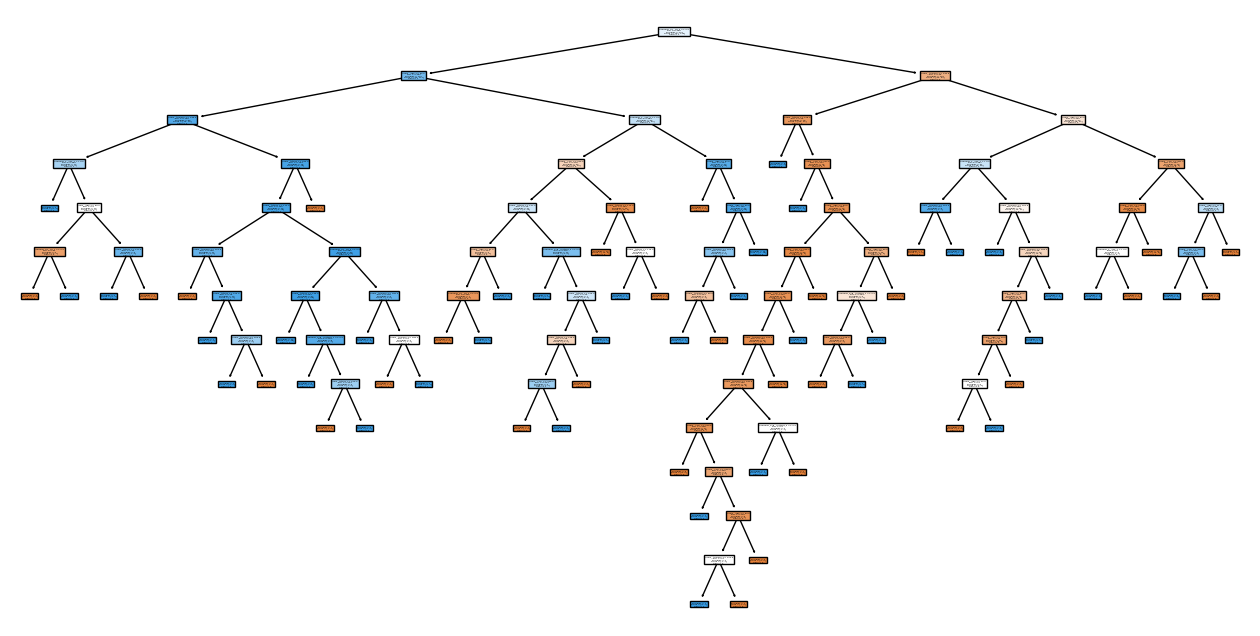

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'clf' is your trained decision tree classifier
plt.figure(figsize=(16, 8))  # Set the figure size
plot_tree(DTplot.fit(X, y).named_steps['DT1'], feature_names=ct.fit_transform(X).columns.tolist(), class_names=['0','1'], filled=True)
plt.show()

The most important features look to be cp, age, and thalach. This is because cp is at the very top the the deicsion tree and thalach and age are on the second level of the decision tree. In addition to this, the coefficients of the log model that have in the top five for greatest magnitude among all of the features.

Q5: ROC Curve

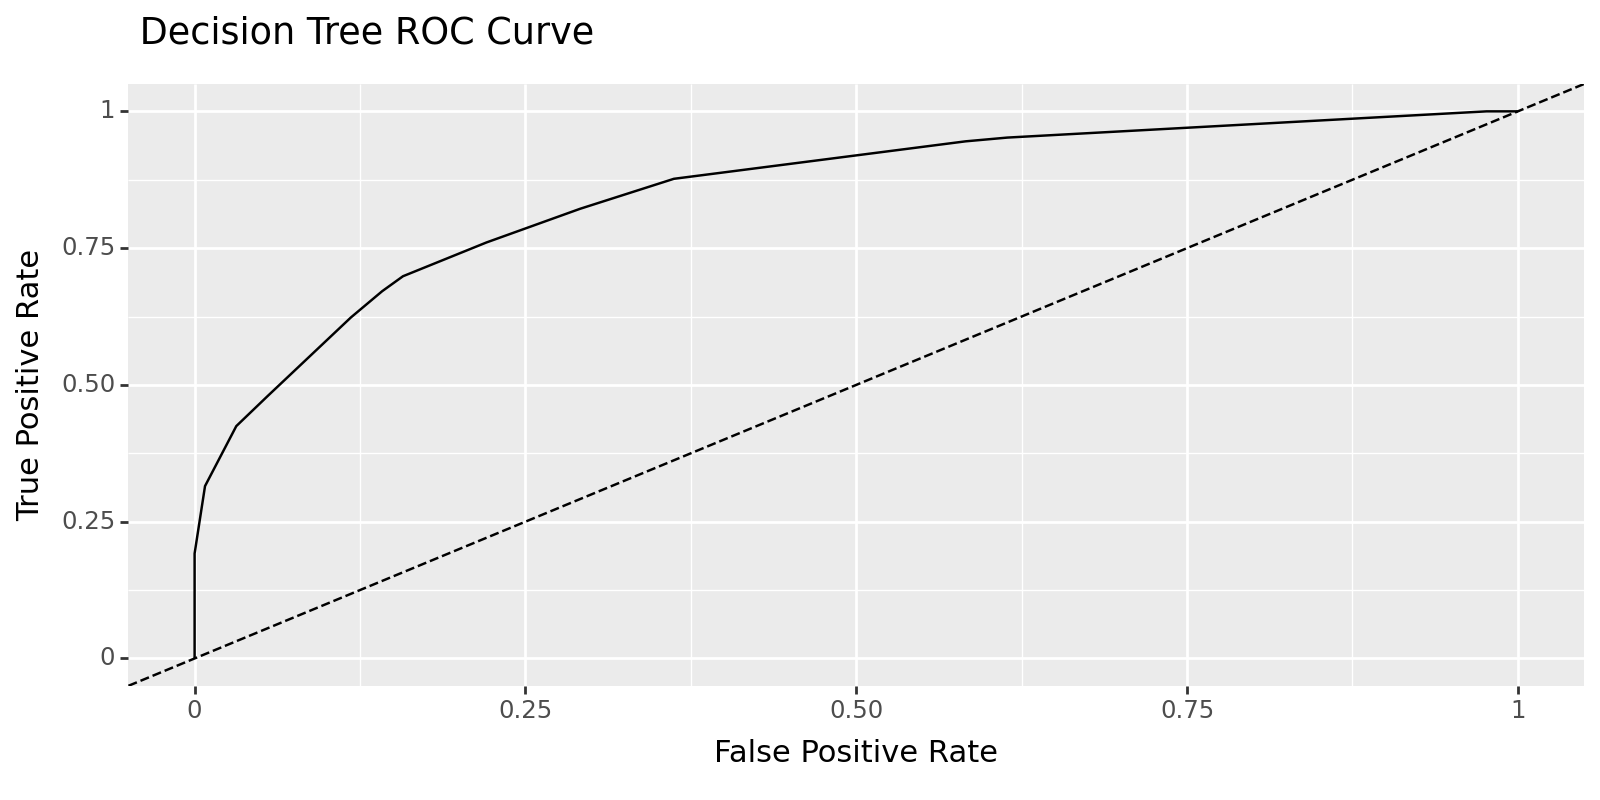

<Figure Size: (800 x 400)>

In [22]:
y_probsDT = DTfit.predict_proba(X)

fprDT, tprDT, thresholds = roc_curve(y_bin[:,0], y_probsDT[:,1], pos_label=1)
rc1 = pd.DataFrame({"fprDT": fprDT, "tprDT": tprDT})
from plotnine import *
(
    ggplot(rc1)
    + aes(x='fprDT', y = 'tprDT')
    + geom_line()
    + geom_abline(linetype = 'dashed')
    + labs(x='False Positive Rate', y = "True Positive Rate", title = " Decision Tree ROC Curve")
    + theme(figure_size=(8, 4))
)

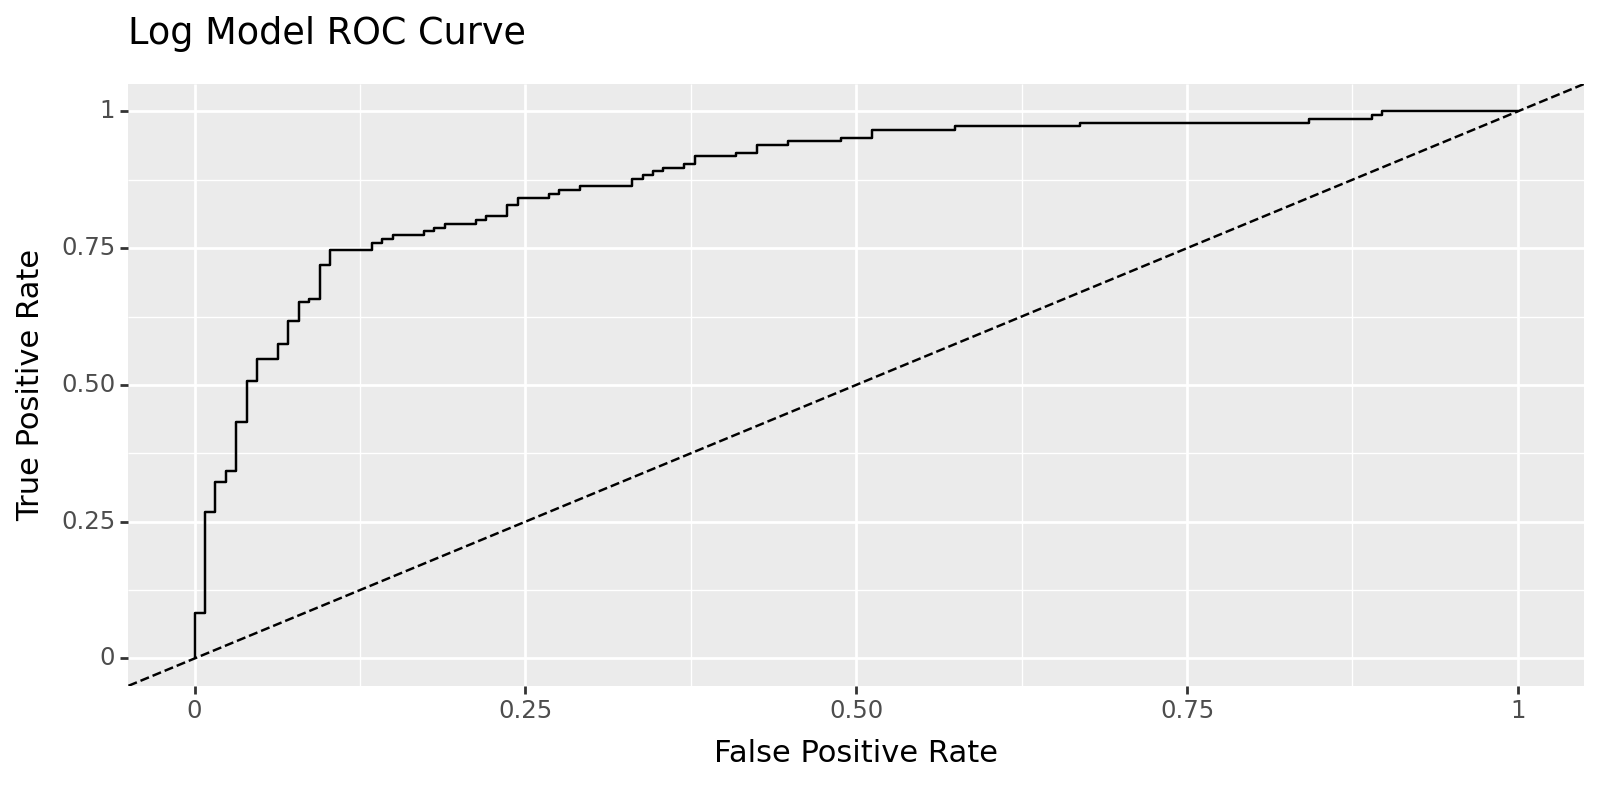

<Figure Size: (800 x 400)>

In [23]:
y_probsLog = logfit.predict_proba(X)

fprlog, tprlog, thresholds = roc_curve(y_bin[:,0], y_probsLog[:,1], pos_label=1)
rc1 = pd.DataFrame({"fpr": fprlog, "tpr": tprlog, "threshold": thresholds})
from plotnine import *
(
    ggplot(rc1)
    + aes(x='fpr', y = 'tpr')
    + geom_line()
    + geom_abline(linetype = 'dashed')
    + labs(x='False Positive Rate', y = "True Positive Rate", title = "Log Model ROC Curve")
    + theme(figure_size=(8, 4))
)

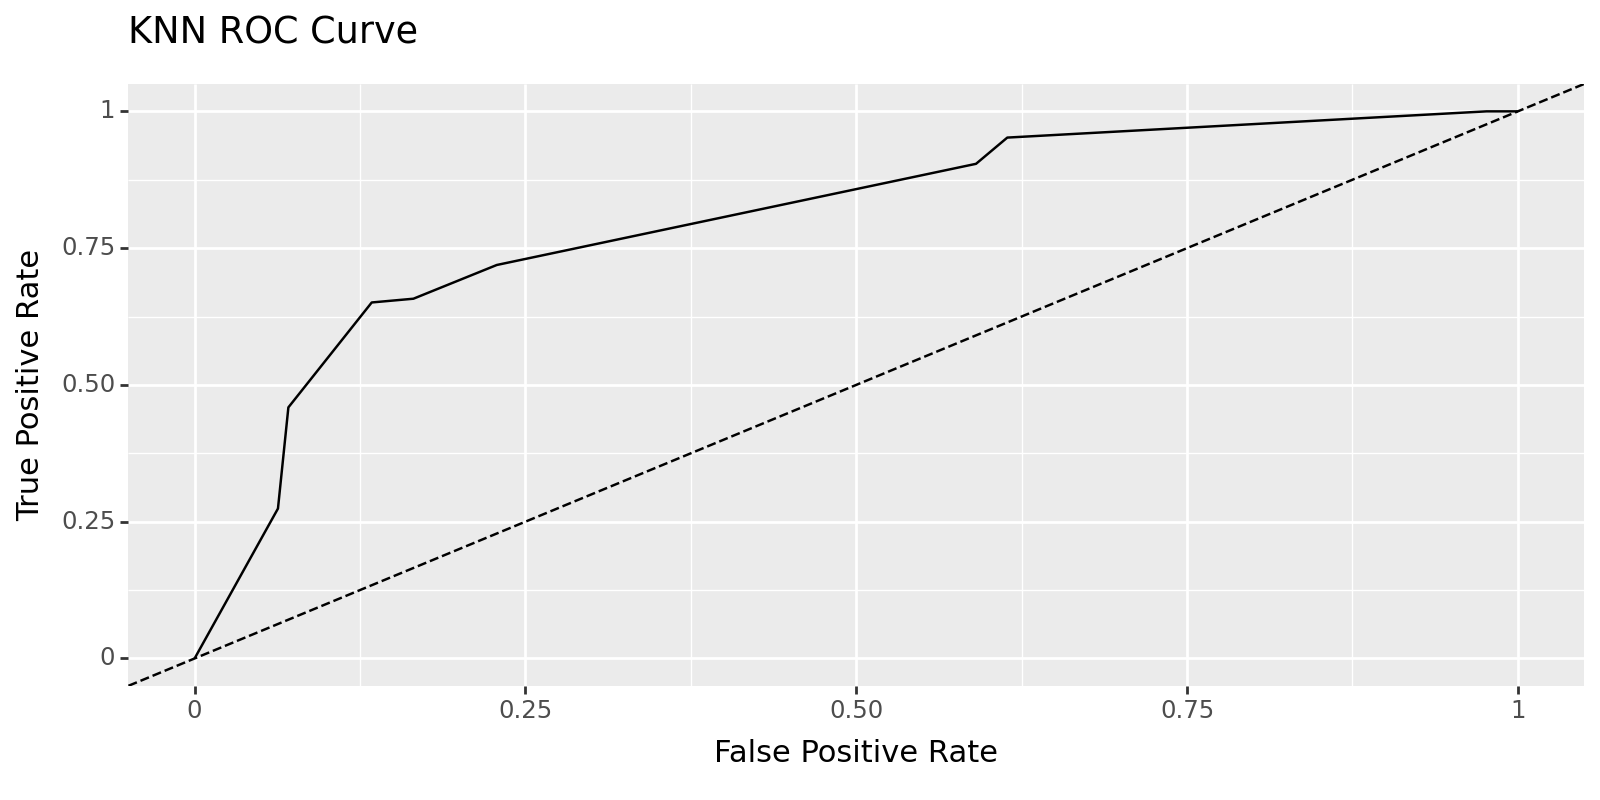

<Figure Size: (800 x 400)>

In [24]:
fprKN, tprKN, thresholds = roc_curve(y_bin[:,0], y_probs[:,1], pos_label=1)
rc1 = pd.DataFrame({"fpr": fprKN, "tpr": tprKN, "threshold": thresholds})
from plotnine import *
(
    ggplot(rc1)
    + aes(x='fpr', y = 'tpr')
    + geom_line()
    + geom_abline(linetype = 'dashed')
    + labs(x='False Positive Rate', y = "True Positive Rate", title = "KNN ROC Curve")
    + theme(figure_size=(8, 4))
)

## PART 2: METRICS

True Positive Rate or Recall or Sensitivity = Of the observations that are truly Class A, how many were predicted to be Class A?

In [25]:
print({'KNN':cross_val_score(Knn1, X,y, cv=5, scoring = "recall").mean(), "Log": cross_val_score(log, X, y, cv=5, scoring = "recall").mean(), "Decision Tree": cross_val_score(DT1, X, y, scoring = "recall").mean()})

{'KNN': 0.8836781609195402, 'Log': 0.8156321839080458, 'Decision Tree': 0.7457471264367816}


C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\jamla\anaconda33\Lib\site-packages\

Precision or Positive Predictive Value = Of all the observations classified as Class A, how many of them were truly from Class A?

In [26]:
print({'KNN':cross_val_score(Knn1, X,y, cv=5, scoring = "precision").mean(), "Log": cross_val_score(log, X, y, cv=5, scoring = "precision").mean(), "Decision Tree": cross_val_score(DT1, X, y, scoring = "precision").mean()})

{'KNN': 0.7036200311810068, 'Log': 0.7855747618440466, 'Decision Tree': 0.7678172555571936}


C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\jamla\anaconda33\Lib\site-packages\

True Negative Rate or Specificity or Negative Predictive Value = Of all the observations classified as NOT Class A, how many were truly NOT Class A?

In [27]:
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
specificity = make_scorer(recall_score, pos_label=0)
print({'KNN':cross_val_score(Knn1, X,y, cv=5, scoring = specificity).mean(), "Log": cross_val_score(log, X, y, cv=5, scoring = specificity).mean(), "Decision Tree": cross_val_score(DT1, X, y, scoring = specificity).mean()})

{'KNN': 0.5680000000000001, 'Log': 0.7304615384615385, 'Decision Tree': 0.7313846153846155}


C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\jamla\anaconda33\Lib\site-packages\

## PART THREE: DISCUSSION

Suppose you have been hired by a hospital to create classification models for heart attack risk.

The following questions give a possible scenario for why the hospital is interested in these models. For each one, discuss:

Which metric(s) you would use for model selection and why.


Which of your final models (Part One Q1-3) you would recommend to the hospital, and why.

What score you should expect for your chosen metric(s) using your chosen model to predict future observations.

## Q1:
The hospital faces severe lawsuits if they deem a patient to be low risk, and that patient later experiences a heart attack.

I would use sensitivity because we would rather deem too many people high risk than too many people low risk. This makes recall the best option.

I would chose KNN because it has the highest sensitivity score. The score is .884

## Q2
The hospital is overfull, and wants to only use bed space for patients most in need of monitoring due to heart attack risk.

I would use precision because we want to know how many actually are at risk at the highest accuracy.

I would chose Log because it has the highest precision. The score is .781

## Q3
The hospital is studying root causes of heart attacks, and would like to understand which biological measures are associated with heart attack risk.

I would use recall because we want to make sure we have the highest overall accuracy.

I would chose KNN because it has the highest recall. The score is .884

## Q4
The hospital is training a new batch of doctors, and they would like to compare the diagnoses of these doctors to the predictions given by the algorithm to measure the ability of new doctors to diagnose patients.

I would use precision because we want to make sure that we have the highest overall accuracy and the doctors have to be able to measure the absolute ability of the new doctors. I would chose the Log model because it has the highest precision score of .781.

## PART FOUR: VALIDATION

In [28]:
ha_val = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")
val_y = ha_val['output']
val_X = ha_val.drop(['output'], axis = 1)

Use each of your final models in Part One Q1-3, predict the target variable in the validation dataset.

For each, output a confusion matrix, and report the ROC AUC, the precision, and the recall.

Compare these values to the cross-validated estimates you reported in Part One and Part Two. Did our measure of model success turn out to be approximately correct for the validation data?

KNN Validation

In [29]:
val_knn = Knn1.predict(val_X)
print(f"Confusion Matrix:\n {confusion_matrix(val_y, val_knn)}")
print(f"ROC_AUC Score: {roc_auc_score(val_y, val_knn)}")
print(f"Recall Score: {recall_score(val_y, val_knn)}")
print(f"Precision Score: {precision_score(val_y, val_knn)}")

Confusion Matrix:
 [[ 5  6]
 [ 1 18]]
ROC_AUC Score: 0.700956937799043
Recall Score: 0.9473684210526315
Precision Score: 0.75


Log Validation

In [30]:
val_log = logfit.predict(val_X)
print(f"Confusion Matrix:\n {confusion_matrix(val_y, val_log)}")
print(f"ROC_AUC Score: {roc_auc_score(val_y, val_log)}")
print(f"Recall Score: {recall_score(val_y, val_log)}")
print(f"Precision Score: {precision_score(val_y, val_log)}")

Confusion Matrix:
 [[ 9  2]
 [ 4 15]]
ROC_AUC Score: 0.8038277511961722
Recall Score: 0.7894736842105263
Precision Score: 0.8823529411764706


Decision Tree Validation

In [31]:
val_DT = DTfit.predict(val_X)
print(f"Confusion Matrix:\n {confusion_matrix(val_y, val_DT)}")
print(f"ROC_AUC Score: {roc_auc_score(val_y, val_DT)}")
print(f"Recall Score: {recall_score(val_y, val_DT)}")
print(f"Precision Score: {precision_score(val_y, val_DT)}")

Confusion Matrix:
 [[10  1]
 [ 9 10]]
ROC_AUC Score: 0.7177033492822966
Recall Score: 0.5263157894736842
Precision Score: 0.9090909090909091


Compareing our cross validated scores in part 1 and 2 and the validated data, our measures of model sucess turned out to be approximately correct.

## Part Five: Cohen’s Kappa

Use online resources to research this measurement. Calculate it for the models from Part One, Q1-3, and discuss reasons or scenarios that would make us prefer to use this metric as our measure of model success. Do your conclusions from above change if you judge your models using Cohen’s Kappa instead? Does this make sense?

In [32]:
from sklearn.metrics import cohen_kappa_score

In [33]:
#KNN
cohen_kappa_score(y, y_test_preds)

0.3236743215031316

In [34]:
#Log
cohen_kappa_score(y, y_log_preds)

0.5936510513923845

In [35]:
#DecisionTree
cohen_kappa_score(y, y_DT_preds)

0.5378724776311901

A reason to use Cohen's Kappa as a measure of model sucess is when the target variable is balanced and the target variable does not influence the prediction. My conclusions from above do not change because the model that performed the best was Log for both the auc_roc score as well as cohen's Kappa. This makes sense because the classification sizes are the same and the target variable is balanced.